### Importações e dicionários

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import datetime as dt
from glob import glob
import psycopg2
from bs4 import BeautifulSoup
import re
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_colwidth', None)

In [2]:
def ConsultaSQL(sql, conf):
    conn = psycopg2.connect(conf)
    try:
        cursor = conn.cursor()
        cursor.execute(sql)
        colnames = []
        colnames = [desc[0] for desc in cursor.description]
        linhas = cursor.fetchall()
        conn.commit()
        cursor.close()
        conn.close()

    except(Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
    df = pd.DataFrame(data = linhas, columns=colnames)
    #df.columns = colnames
    #df.append(linhas) 
    return df

def ConsultarBanco(caminho, conf):
    with open(caminho, 'r') as arquivo:
        consulta_sql = arquivo.read()
        consulta_sql = re.sub(r'[\ufeff]', '', consulta_sql)
        nome_arquivo = os.path.splitext(os.path.basename(caminho))[0]
        print(nome_arquivo)
    return(ConsultaSQL(consulta_sql, conf))
    

In [3]:
dictdfur = {'UR-1':'UR-01','UR-2':'UR-02','UR-3':'UR-03','UR-4':'UR-04','UR-5':'UR-05','UR-6':'UR-06','UR-7':'UR-07','UR-8':'UR-08','UR-9':'UR-09',
            '1-DF':'DF-01','2-DF':'DF-02','3-DF':'DF-03','4-DF':'DF-04','DF-4':'DF-04','5-DF':'DF-05','6-DF':'DF-06','7-DF':'DF-07','8-DF':'DF-08','9-DF':'DF-09'}

dictmun = {"Altair":"Altair","Aparecida d Oeste":"Aparecida d'Oeste","Biritiba-Mirim":"Biritiba Mirim","Estrela d Oeste":"Estrela d'Oeste","Florínia":"Florínea",
           "Guarani d Oeste":"Guarani d'Oeste","Itaóca":"Itaoca","Palmeira d Oeste":"Palmeira d'Oeste","Paulínia":"Paulínia","Santa Bárbara d Oeste":"Santa Bárbara d'Oeste",
           "Santa Clara d Oeste":"Santa Clara d'Oeste","Santa Rita d Oeste":"Santa Rita d'Oeste","Santana de Parnaíba":"Santana de Parnaíba","São João do Pau d Alho":"São João do Pau d'Alho",
           "São Luís do Paraitinga":"São Luiz do Paraitinga"
           }

dictorg = {"PREFEITURA MUNICIPAL DE ALTAIR-SP":"PREFEITURA MUNICIPAL DE ALTAIR/SP","PREFEITURA MUNICIPAL DE APARECIDA D OESTE":"PREFEITURA MUNICIPAL DE APARECIDA D OESTE",
           "PREFEITURA MUNICIPAL DE BIRITIBA-MIRIM":"PREFEITURA MUNICIPAL DE BIRITIBA MIRIM","PREFEITURA MUNICIPAL DE FLORÍNEA":"PREFEITURA MUNICIPAL DE FLORÍNEA",
           "PREFEITURA MUNICIPAL DE GUARANI D OESTE":"PREFEITURA MUNICIPAL DE GUARANI D'OESTE","PREFEITURA MUNICIPAL DE ITAÓCA":"PREFEITURA MUNICIPAL DE ITAOCA",
           "PREFEITURA MUNICIPAL DE PAULINIA":"PREFEITURA MUNICIPAL DE PAULÍNIA","PREFEITURA MUNICIPAL DE SANTA CLARA D OESTE":"PREFEITURA MUNICIPAL DE SANTA CLARA D'OESTE",
           "PREFEITURA MUNICIPAL DE SANTA RITA D OESTE":"PREFEITURA MUNICIPAL DE SANTA RITA D'OESTE",
           "PREFEITURA MUNICIPAL DE SANTANA de PARNAIBA":"PREFEITURA MUNICIPAL DE SANTANA DE PARNAIBA",
           "PREFEITURA MUNICIPAL DE SÃO LUÍS DO PARAITINGA":"PREFEITURA MUNICIPAL DE SÃO LUIZ DO PARAITINGA",
           'FUNDAÇÃO MUNICIPAL P-EDUCÇÃO COMUNITÁRIA - FUMEC':'FUNDAÇÃO MUNICIPAL P/EDUCÇÃO COMUNITÁRIA - FUMEC',
           'INSTITUTO MUNICIPAL ENSINO SUPERIOR-IMES-FAFICA':'INSTITUTO MUNICIPAL ENSINO SUPERIOR-IMES/FAFICA',
           'CÂMARA MUNICIPAL DE GUARANI D OESTE':"CÂMARA MUNICIPAL DE GUARANI D'OESTE",
           'IPASP - CNPJ 51.327.724-0001-85':'IPASP - CNPJ 51.327.724/0001-85',
           'SEMAE  - CNPJ 50.853.555-0001-54':'SEMAE  - CNPJ 50.853.555/0001-54',
           'CÂMARA MUNICIPAL DE SANTA CLARA D OESTE':"CÂMARA MUNICIPAL DE SANTA CLARA D'OESTE",
           'CÂMARA MUNICIPAL DE SANTA RITA D OESTE':"CÂMARA MUNICIPAL DE SANTA RITA D'OESTE",
           'FUNDO DE PREVIDÊNCIA SOCIAL DO MUNICÍPIO DE SUMARÉ-SP':'FUNDO DE PREVIDÊNCIA SOCIAL DO MUNICÍPIO DE SUMARÉ/SP'
           }

### Unir todas as planilhas do PTM a partir de 2010 agrupando por Exercício/Município/Órgão/Subitem

In [4]:
'''arquivos = sorted(glob('E:/5 Base PTM/*.csv'))

result = pd.DataFrame()

for municipio in arquivos: 
    df = pd.read_csv(municipio, 
                     delimiter=';', 
                     decimal=',', 
                     encoding='ANSI', 
                     usecols=['ano_exercicio', 'ds_municipio', 'ds_orgao', 'ds_elemento', 'tp_despesa', 'dt_emissao_despesa', 'vl_despesa'])
    df = df.loc[df.tp_despesa=='Valor Liquidado']

    # Converter para datetime
    df['dt_emissao_despesa'] = pd.to_datetime(df['dt_emissao_despesa'], format='%d/%m/%Y')

    # Criar nova coluna no formato AAAAMM
    df['ano_mes'] = df['dt_emissao_despesa'].dt.strftime('%Y%m')

    df = pd.pivot_table(df, index = ['ano_exercicio', 'ds_municipio', 'ds_orgao', 'ds_elemento', 'ano_mes'], values='vl_despesa', aggfunc='sum').reset_index() 
    result = pd.concat([result, df])

result['cod_subelemento'] = result.ds_elemento.str[4:8]
result['cod_elemento'] = result.ds_elemento.str[4:6]
result.to_parquet('E:/5 Base PTM/Base por Subelemento 29.01.2025.parquet', index=False)
len(result.index)'''

"arquivos = sorted(glob('E:/5 Base PTM/*.csv'))\n\nresult = pd.DataFrame()\n\nfor municipio in arquivos: \n    df = pd.read_csv(municipio, \n                     delimiter=';', \n                     decimal=',', \n                     encoding='ANSI', \n                     usecols=['ano_exercicio', 'ds_municipio', 'ds_orgao', 'ds_elemento', 'tp_despesa', 'dt_emissao_despesa', 'vl_despesa'])\n    df = df.loc[df.tp_despesa=='Valor Liquidado']\n\n    # Converter para datetime\n    df['dt_emissao_despesa'] = pd.to_datetime(df['dt_emissao_despesa'], format='%d/%m/%Y')\n\n    # Criar nova coluna no formato AAAAMM\n    df['ano_mes'] = df['dt_emissao_despesa'].dt.strftime('%Y%m')\n\n    df = pd.pivot_table(df, index = ['ano_exercicio', 'ds_municipio', 'ds_orgao', 'ds_elemento', 'ano_mes'], values='vl_despesa', aggfunc='sum').reset_index() \n    result = pd.concat([result, df])\n\nresult['cod_subelemento'] = result.ds_elemento.str[4:8]\nresult['cod_elemento'] = result.ds_elemento.str[4:6]\nre

In [5]:
result = pd.read_parquet('E:/5 Base PTM/Base por Subelemento 29.01.2025.parquet')
result.ds_municipio = result.ds_municipio.replace(dictmun)
result.ds_orgao = result.ds_orgao.replace(dictorg)

In [6]:
result.head()

,ano_exercicio,ds_municipio,ds_orgao,ds_elemento,ano_mes,vl_despesa,cod_subelemento,cod_elemento
0,2010,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,31900187 - COMPLEMENTAÇÃO DE APOSENTADORIAS,201001,"15,550.64",0187,01
1,2010,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,31900187 - COMPLEMENTAÇÃO DE APOSENTADORIAS,201002,"15,550.64",0187,01
2,2010,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,31900187 - COMPLEMENTAÇÃO DE APOSENTADORIAS,201003,"16,455.72",0187,01
3,2010,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,31900187 - COMPLEMENTAÇÃO DE APOSENTADORIAS,201004,"15,965.86",0187,01
4,2010,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,31900187 - COMPLEMENTAÇÃO DE APOSENTADORIAS,201005,"15,550.64",0187,01


### Aplicar Inflação

In [7]:
ipca = pd.read_excel("./Base/IPCA 2010 a 2023.xlsx")
ipca = ipca[['Mês (Código)', 'ipca_acumulado']].rename(columns={'Mês (Código)':'ano_mes',
                                                                'ipca_acumulado':'ipca_acumulado_multiplicador'})
ipca.ano_mes = ipca.ano_mes.astype(str)

In [8]:
result = result.merge(ipca)

In [9]:
result.head()

,ano_exercicio,ds_municipio,ds_orgao,ds_elemento,ano_mes,vl_despesa,cod_subelemento,cod_elemento,ipca_acumulado_multiplicador
0,2010,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,31900187 - COMPLEMENTAÇÃO DE APOSENTADORIAS,201001,"15,550.64",0187,01,2.24
1,2010,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,31900187 - COMPLEMENTAÇÃO DE APOSENTADORIAS,201002,"15,550.64",0187,01,2.23
2,2010,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,31900187 - COMPLEMENTAÇÃO DE APOSENTADORIAS,201003,"16,455.72",0187,01,2.21
3,2010,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,31900187 - COMPLEMENTAÇÃO DE APOSENTADORIAS,201004,"15,965.86",0187,01,2.20
4,2010,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,31900187 - COMPLEMENTAÇÃO DE APOSENTADORIAS,201005,"15,550.64",0187,01,2.19


In [10]:
result.columns

Index(['ano_exercicio', 'ds_municipio', 'ds_orgao', 'ds_elemento', 'ano_mes',
       'vl_despesa', 'cod_subelemento', 'cod_elemento',
       'ipca_acumulado_multiplicador'],
      dtype='object')

In [11]:
result['vl_corrigido'] = result.vl_despesa*result.ipca_acumulado_multiplicador

In [12]:
result[['ds_municipio', 'ds_orgao', 'ds_elemento', 'ano_mes',
       'vl_despesa', 'vl_corrigido']].sample(5)

,ds_municipio,ds_orgao,ds_elemento,ano_mes,vl_despesa,vl_corrigido
320000,Jacupiranga,CÂMARA MUNICIPAL DE JACUPIRANGA,31901302 - CONTRIBUIÇÕES PREVIDENCIÁRIAS - INSS,201007,"5,057.32","11,011.74"
1481159,Ubatuba,PREFEITURA MUNICIPAL DE UBATUBA,33903004 - GÁS ENGARRAFADO,201111,"18,612.00","37,415.82"
7502529,Luiziânia,CÂMARA MUNICIPAL DE LUIZIÂNIA,31901144 - FÉRIAS - ABONO PECUNIÁRIO,201906,"6,778.66","8,806.22"
2956625,São Carlos,FESC - FUNDAÇÃO EDUCACIONAL SÃO CARLOS,33903022 - MATERIAL DE LIMPEZA E PRODUTOS DE HIGIENIZAÇÃO,201311,"3,312.60","5,966.84"
5886206,Mirassol,CÂMARA MUNICIPAL DE MIRASSOL,"33903635 - SERVIÇO DE APOIO ADMINISTRATIVO, TÉCNICO E OPERACIONAL",201709,240.00,334.96


In [13]:
result['vl_despesa'] = result['vl_corrigido']

### Calcular valores anuais

In [14]:
result = pd.pivot_table(result, index = ['ano_exercicio', 'ds_municipio', 'ds_orgao', 'ds_elemento'], values='vl_despesa', aggfunc='sum').reset_index() 

In [15]:
result.shape

(1645898, 5)

In [16]:
result['cod_subelemento'] = result.ds_elemento.str[4:8]
result['cod_elemento'] = result.ds_elemento.str[4:6]

### Análise da Despesa por Tipo de Entidade em 2023

entidade


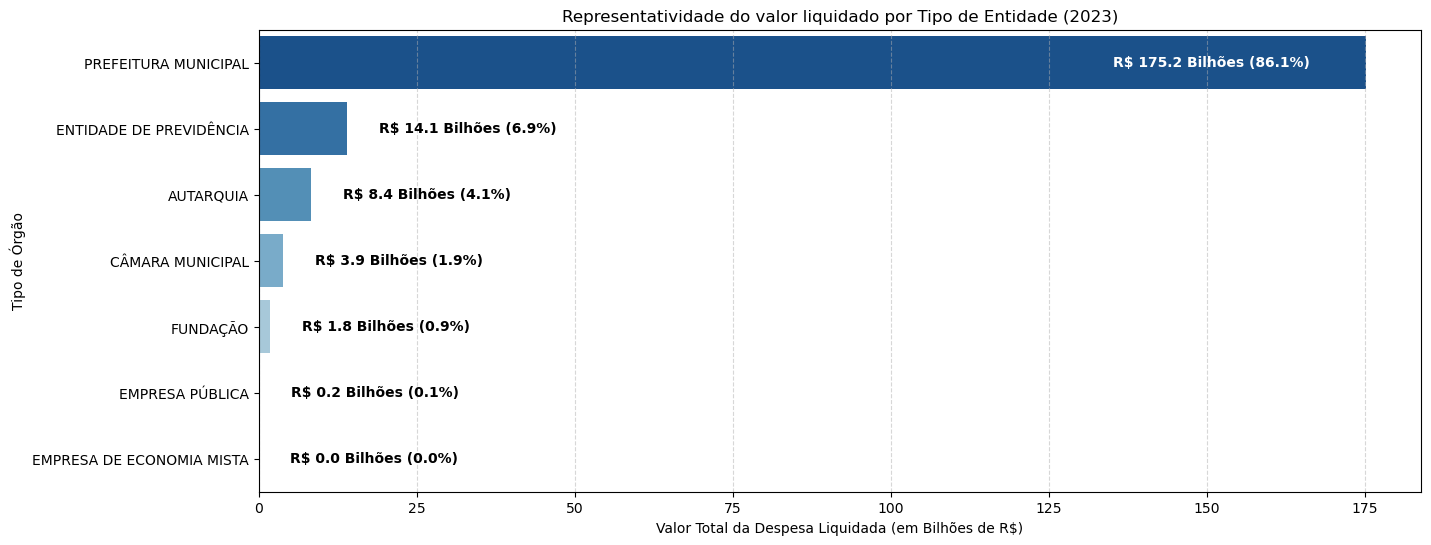

In [17]:
conf = 'dbname=audesp user=usr_leitura host=10.26.254.74'
caminho = './SQL/entidade.sql'
entidade = ConsultarBanco(caminho, conf)
entidade['Município'] = entidade['Município'].str.strip()
entidade['Órgão'] = entidade['Órgão'].str.strip()
entidade = entidade.rename(columns={'Município':'ds_municipio', 'Órgão':'ds_orgao'})

tipo_orgao = result.merge(entidade[['ds_orgao', 'ds_tp_entidade']])
tipo_orgao.ds_tp_entidade = tipo_orgao.ds_tp_entidade.replace({'FUNDO DE PREVIDÊNCIA - ÓRGÃO':'ENTIDADE DE PREVIDÊNCIA'})

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filtrar o dataframe para o ano de 2023
df_2023 = tipo_orgao[tipo_orgao['ano_exercicio'] == 2023]

# Agregar o total de vl_despesa por ds_tp_entidade
despesa_por_tipo = df_2023.groupby('ds_tp_entidade')['vl_despesa'].sum().reset_index()

# Ordenar por valor de despesa (decrescente)
despesa_por_tipo = despesa_por_tipo.sort_values(by='vl_despesa', ascending=False)

# Calcular valores em milhões e percentual do total
despesa_total = despesa_por_tipo['vl_despesa'].sum()
despesa_por_tipo['vl_despesa_bilhoes'] = despesa_por_tipo['vl_despesa'] / 1_000_000_000  # Convertendo para bilhões
despesa_por_tipo['percentual'] = (despesa_por_tipo['vl_despesa'] / despesa_total) * 100  # Percentual do total

# Criar o gráfico de barras horizontais
plt.figure(figsize=(15, 6))
ax = sns.barplot(
    data=despesa_por_tipo, 
    y='ds_tp_entidade', 
    x='vl_despesa_bilhoes', 
    hue='ds_tp_entidade',  # Corrigindo o warning
    palette='Blues_r',
    legend=False  # Removendo a legenda
)


# Adicionar os valores e percentuais em cada barra
max_value = despesa_por_tipo['vl_despesa_bilhoes'].max()  # Maior valor para referência

for i, (valor, perc) in enumerate(zip(despesa_por_tipo['vl_despesa_bilhoes'], despesa_por_tipo['percentual'])):
    if valor > max_value * 0.3:  # Se a barra for grande, colocar o texto dentro (branco)
        ax.text(valor * 0.95, i, f'R$ {valor:.1f} Bilhões ({perc:.1f}%)', 
                va='center', ha='right', fontsize=10, fontweight='bold', color='white')
    else:  # Se a barra for pequena, manter o texto fora (preto)
        ax.text(valor + 5, i, f'R$ {valor:.1f} Bilhões ({perc:.1f}%)', 
                va='center', fontsize=10, fontweight='bold', color='black')

# Configurações do gráfico
plt.xlabel("Valor Total da Despesa Liquidada (em Bilhões de R$)")
plt.ylabel("Tipo de Órgão")
plt.title("Representatividade do valor liquidado por Tipo de Entidade (2023)")
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Exibir o gráfico
plt.show()

### Filtrar apenas Prefeituras Municipais

In [18]:
result = result.merge(entidade[['ds_orgao', 'ds_tp_entidade']], how='left')

In [19]:
result.loc[(result.ds_tp_entidade.isna())&(result.ano_exercicio==2023), 'vl_despesa'].sum()

0.0

In [20]:
result = result.loc[result.ds_tp_entidade=='PREFEITURA MUNICIPAL']

In [21]:
result.loc[result.ano_exercicio == 2023].head()

,ano_exercicio,ds_municipio,ds_orgao,ds_elemento,vl_despesa,cod_subelemento,cod_elemento,ds_tp_entidade
1546486,2023,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,31900101 - PROVENTOS - PESSOAL CIVIL,"1,969,261.88",0101,01,PREFEITURA MUNICIPAL
1546487,2023,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,31900106 - 13º SALÁRIO - PESSOAL CIVIL,"172,764.05",0106,01,PREFEITURA MUNICIPAL
1546488,2023,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,"31900151 - ADICIONAIS, VANTAGENS, GRATIFICAÇÕES E OUTROS COMPLEMENTOS DE PROVENTOS - PESSOAL CIVIL","814,014.82",0151,01,PREFEITURA MUNICIPAL
1546489,2023,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,31900199 - OUTRAS APOSENTADORIAS,"24,175.73",0199,01,PREFEITURA MUNICIPAL
1546490,2023,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,31900301 - PESSOAL CIVIL,"1,834,590.38",0301,03,PREFEITURA MUNICIPAL


### Análise dos Elementos de 2023

In [22]:
# Carrega os dados do arquivo Excel 'elementos2023.xlsx' que contém os códigos e descrições dos subelementos utilizados em 2023
elementos2023 = pd.read_excel('./Base/elementos2023.xlsx', dtype={'cod_elemento': 'object'})

# Cria uma nova coluna 'tamanho' que armazena o número de caracteres de cada item na coluna 'ds_elemento'
elementos2023['tamanho'] = elementos2023['ds_elemento'].str.strip().apply(len)

# confirma que ao remover duplicatas sobram apenas subelementos únicos
(
    len(elementos2023.sort_values('tamanho')  # Ordena pelo tamanho da string
        .drop_duplicates(subset='cod_elemento', keep='first')  # Remove duplicatas mantendo o primeiro valor encontrado para cada 'Subelemento'
        .index)  # Obtém a quantidade de índices restantes
    ==
    elementos2023.sort_values('tamanho')  # Ordena pelo tamanho da string
        .drop_duplicates(subset='cod_elemento', keep='first')  # Remove duplicatas mantendo o primeiro valor encontrado para cada 'Subelemento'
        ['cod_elemento'].nunique()  # Conta o número de valores únicos na coluna 'Subelemento'
)

# Atualiza o DataFrame mantendo apenas os registros únicos de 'Subelemento' 
elementos2023 = elementos2023.sort_values('tamanho').drop_duplicates(subset='cod_elemento', keep='first').drop('tamanho', axis=1).sort_values('cod_elemento')


In [23]:
# Criação da pivot table
tabela_elemento = pd.pivot_table(
    result.loc[result.ano_exercicio == 2023], 
    index='cod_elemento', 
    values='vl_despesa', 
    aggfunc='sum'
).reset_index()

# Ordenação por 'vl_despesa' em ordem decrescente
tabela_elemento = tabela_elemento.sort_values('vl_despesa', ascending=False)

# Cálculo do percentual que cada 'vl_despesa' representa do total
tabela_elemento['percentual'] = (tabela_elemento['vl_despesa'] / tabela_elemento['vl_despesa'].sum()) * 100

# Cálculo do percentual acumulado
tabela_elemento['percentual_acumulado'] = tabela_elemento['percentual'].cumsum()

In [24]:
tabela_elemento = tabela_elemento.merge(elementos2023)

In [25]:
tabela_elemento=tabela_elemento[['cod_elemento', 'ds_elemento', 'vl_despesa', 'percentual', 'percentual_acumulado']].sort_values('percentual_acumulado')

In [26]:
tabela_elemento.loc[tabela_elemento.percentual<2].to_excel('elementos que representam menos de 2%.xlsx', index=False)

In [27]:
agrupar_por_elemento = tabela_elemento.loc[tabela_elemento.percentual<2,'cod_elemento'].unique()

In [28]:
# Carrega os dados do arquivo Excel 'subelementos2023.xlsx' que contém os códigos e descrições dos subelementos utilizados em 2023
subelementos2023 = pd.read_excel('./Base/subelementos2023.xlsx', dtype={'Subelemento': 'object'})

# Cria uma nova coluna 'tamanho' que armazena o número de caracteres de cada item na coluna 'NOME DO CÓDIGO'
subelementos2023['tamanho'] = subelementos2023['NOME DO CÓDIGO'].str.strip().apply(len)

# confirma que ao remover duplicatas sobram apenas subelementos únicos
(
    len(subelementos2023.sort_values('tamanho')  # Ordena pelo tamanho da string
        .drop_duplicates(subset='Subelemento', keep='first')  # Remove duplicatas mantendo o primeiro valor encontrado para cada 'Subelemento'
        .index)  # Obtém a quantidade de índices restantes
    ==
    subelementos2023.sort_values('tamanho')  # Ordena pelo tamanho da string
        .drop_duplicates(subset='Subelemento', keep='first')  # Remove duplicatas mantendo o primeiro valor encontrado para cada 'Subelemento'
        ['Subelemento'].nunique()  # Conta o número de valores únicos na coluna 'Subelemento'
)

# Atualiza o DataFrame mantendo apenas os registros únicos de 'Subelemento' 
subelementos2023 = subelementos2023.sort_values('tamanho').drop_duplicates(subset='Subelemento', keep='first')
subelementos2023 = subelementos2023.rename(columns={'Subelemento':'cod_subelemento',
                                                    'NOME DO CÓDIGO':'ds_subelemento'
                                                    }).drop('tamanho', axis=1)

# Criação da pivot table
tabela_subelemento = pd.pivot_table(
    result.loc[result.ano_exercicio == 2023], 
    index='cod_subelemento', 
    values='vl_despesa', 
    aggfunc='sum'
).reset_index()

# Ordenação por 'vl_despesa' em ordem decrescente
tabela_subelemento = tabela_subelemento.sort_values('vl_despesa', ascending=False)

# Cálculo do percentual que cada 'vl_despesa' representa do total
tabela_subelemento['percentual'] = (tabela_subelemento['vl_despesa'] / tabela_subelemento['vl_despesa'].sum()) * 100

# Cálculo do percentual acumulado
tabela_subelemento['percentual_acumulado'] = tabela_subelemento['percentual'].cumsum()

tabela_subelemento['cod_elemento'] = tabela_subelemento.cod_subelemento.str[0:2]

In [29]:
tabela_subelemento.loc[tabela_subelemento.cod_elemento.isin(agrupar_por_elemento)].merge(elementos2023).merge(subelementos2023).to_excel('subitens dos elementos menores do que 2%.xlsx', index=False)

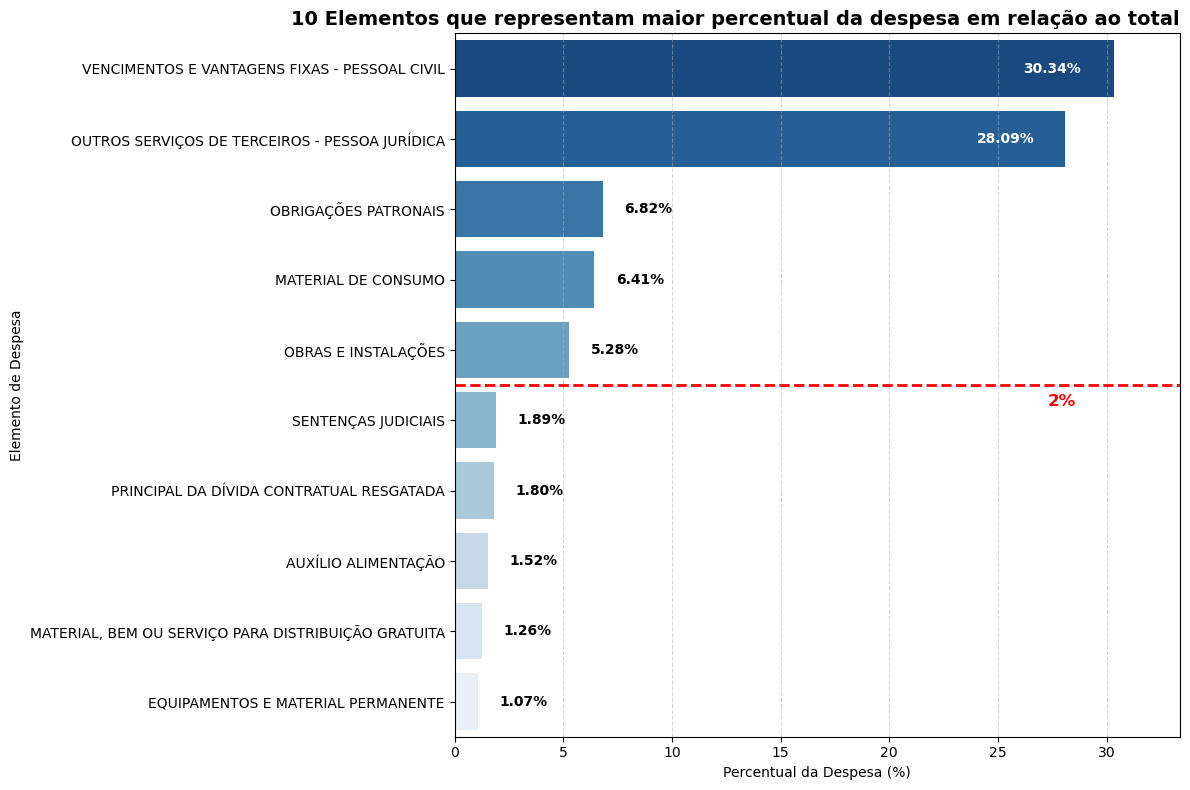

In [30]:
# Filtrar os 10 principais elementos
tabela_filtrada = tabela_elemento.nlargest(10, 'percentual')

# Criar gráfico de barras horizontais
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=tabela_filtrada, 
    y='ds_elemento', 
    x='percentual', 
    hue='ds_elemento',  # Corrige o warning
    palette='Blues_r',
    legend=False  # Remove a legenda
)

# Definir limite do eixo X para acomodar melhor os rótulos
max_percentual = tabela_filtrada['percentual'].max()
plt.xlim(0, max_percentual * 1.1)  # Adiciona 10% a mais para evitar corte

# Adicionar rótulos dentro ou fora da barra dinamicamente
for i, (valor, nome) in enumerate(zip(tabela_filtrada['percentual'], tabela_filtrada['ds_elemento'])):
    if valor > max_percentual * 0.3:  # Se a barra for grande, colocar o texto dentro (branco)
        plt.text(valor * 0.95, i, f"{valor:.2f}%", va='center', ha='right', fontsize=10, fontweight='bold', color='white')
    else:  # Se a barra for pequena, manter o texto fora (preto)
        plt.text(valor + 1, i, f"{valor:.2f}%", va='center', ha='left', fontsize=10, fontweight='bold', color='black')

# Adicionar linha vermelha separando os 5 primeiros elementos dos demais
plt.axhline(y=4.5, color='red', linestyle='--', linewidth=2)

# Adicionar legenda na linha vermelha ("2%")
plt.text(max_percentual * 0.9, 4.8, "2%", color="red", fontsize=12, fontweight="bold")

# Configurações do gráfico
plt.xlabel("Percentual da Despesa (%)")
plt.ylabel("Elemento de Despesa")
plt.title("10 Elementos que representam maior percentual da despesa em relação ao total", fontsize=14, fontweight='bold', loc='right')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Ajustar layout para evitar corte de textos
plt.tight_layout()

# Salvar o gráfico
plt.savefig("grafico_barras_elementos_linha_legenda.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()


In [31]:
tabela_subelemento.loc[tabela_subelemento.cod_elemento=='04'] \
     .merge(subelementos2023)[['cod_subelemento', 'ds_subelemento', 'vl_despesa', 'percentual']] \
     .rename(columns={'cod_subelemento':'Código do Subitem', 
                      'ds_subelemento':'Descrição do Subitem', 
                      'vl_despesa':' Valor Despesa', 
                      'percentual':'Percentual'})

,Código do Subitem,Descrição do Subitem,Valor Despesa,Percentual
0,0411,SALÁRIOS - CONTRATO TEMPORÁRIO,"358,855,160.83",0.20
1,0499,OUTRAS CONTRATAÇÕES POR TEMPO DETERMINADO,"299,888,098.62",0.17
2,0418,PROFESSORES SUBSTITUTOS / VISITANTES,"103,327,940.53",0.06
3,0416,OBRIGAÇÕES PATRONAIS - INSS - CONTRATO TEMPORÁRIO,"49,845,058.83",0.03
4,0413,13º SALÁRIO - CONTRATO TEMPORÁRIO,"29,588,845.37",0.02
5,0415,OBRIGAÇÕES PATRONAIS,"17,125,795.93",0.01
6,0414,FERIAS - ABONO CONSTITUCIONAL - CONTRATO TEMPORÁRIO,"15,214,444.39",0.01
7,0417,OBRIGAÇÕES PATRONAIS - FGTS - CONTRATO TEMPORÁRIO,"8,622,840.88",0.00
8,0400,CONTRATAÇÃO POR TEMPO DETERMINADO,"4,559,548.26",0.00
9,0451,ADICIONAIS DE CONTRATO TEMPORÁRIO,"4,293,951.30",0.00


### Agrupar a tabela por elemento para os pouco representativos (menos de 2% da despesa total)

In [32]:
# Criar um conjunto (set) para busca mais rápida
elementos_set = set(agrupar_por_elemento)

# Aplicar a lógica para modificar cod_subelemento
result['cod_subelemento'] = result.apply(
    lambda row: row['cod_elemento'] + '00' if row['cod_elemento'] in elementos_set else row['cod_subelemento'], 
    axis=1
)

In [33]:
resultado = result.groupby(['ano_exercicio', 'ds_municipio', 'ds_orgao', 'cod_subelemento'])['vl_despesa'].sum().reset_index()

In [34]:
resultado.head()

,ano_exercicio,ds_municipio,ds_orgao,cod_subelemento,vl_despesa
0,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,0100,"6,073,317.27"
1,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,0300,"2,313,660.01"
2,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,0400,"592,488.71"
3,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,1101,"19,430,054.94"
4,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,1137,859.22


### Análise dos subelementos de 2023

In [35]:
# Criação da pivot table
tabela_subelemento = pd.pivot_table(
    resultado.loc[resultado.ano_exercicio == 2023], 
    index='cod_subelemento', 
    values='vl_despesa', 
    aggfunc='sum'
).reset_index()

# Ordenação por 'vl_despesa' em ordem decrescente
tabela_subelemento = tabela_subelemento.sort_values('vl_despesa', ascending=False)

# Cálculo do percentual que cada 'vl_despesa' representa do total
tabela_subelemento['percentual'] = (tabela_subelemento['vl_despesa'] / tabela_subelemento['vl_despesa'].sum()) * 100

# Cálculo do percentual acumulado
tabela_subelemento['percentual_acumulado'] = tabela_subelemento['percentual'].cumsum()

tabela_subelemento['cod_elemento'] = tabela_subelemento.cod_subelemento.str[0:2]

In [36]:
len(tabela_subelemento.index) == len(tabela_subelemento.merge(subelementos2023, how='left')[['cod_subelemento',  
                                                                                             'ds_subelemento', 'vl_despesa', 
                                                                                             'percentual', 'percentual_acumulado']].index)

True

In [37]:
tabela_subelemento = tabela_subelemento.merge(subelementos2023, how='left')[['cod_elemento', 'cod_subelemento',  'ds_subelemento', 
                                                                             'vl_despesa', 'percentual', 'percentual_acumulado']]
tabela_subelemento = tabela_subelemento.merge(elementos2023, how='left')
tabela_subelemento.loc[tabela_subelemento.ds_subelemento.isna(), 'ds_subelemento'] = tabela_subelemento.loc[tabela_subelemento.ds_subelemento.isna(), 'ds_elemento']
tabela_subelemento = tabela_subelemento.drop(['cod_elemento','ds_elemento'], axis=1)

In [38]:
len(tabela_subelemento.index)

219

In [39]:
tabela_subelemento.loc[tabela_subelemento.percentual_acumulado>98]

,cod_subelemento,ds_subelemento,vl_despesa,percentual,percentual_acumulado
102,3004,GÁS ENGARRAFADO,"115,543,488.64",0.07,98.02
103,2200,OUTROS ENCARGOS SOBRE A DÍVIDA POR CONTRATO,"111,946,309.20",0.06,98.08
104,1109,ADICIONAL DE PERICULOSIDADE,"111,220,689.42",0.06,98.15
105,3947,SERVIÇOS DE COMUNICAÇÃO EM GERAL,"108,484,975.83",0.06,98.21
106,1400,DIÁRIAS,"108,221,297.50",0.06,98.27
...,...,...,...,...,...
214,2000,AUXÍLIO FINANCEIRO A PESQUISADORES,"26,397.30",0.00,100.00
215,3032,SUPRIMENTO DE AVIAÇÃO,"9,458.38",0.00,100.00
216,1300,OBRIGAÇÕES PATRONAIS,"6,302.00",0.00,100.00
217,1323,ALÍQUOTA SUPLEMENTAR DE CONTRIBUIÇÃO PREVIDENCIÁRIA - PESSOAL INATIVO E PENSIONISTA - PLANO FINANCEIRO - INTRA OFSS,"2,067.00",0.00,100.00


In [40]:
tabela_subelemento.loc[tabela_subelemento.percentual_acumulado<=98]

,cod_subelemento,ds_subelemento,vl_despesa,percentual,percentual_acumulado
0,1101,VENCIMENTOS E SALÁRIOS,"39,713,037,885.11",22.67,22.67
1,3999,OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA,"15,236,347,256.77",8.70,31.37
2,8500,CONTRATO DE GESTÃO,"6,801,539,225.93",3.88,35.25
3,5199,OUTRAS OBRAS E INSTALAÇÕES,"5,660,279,580.81",3.23,38.48
4,1302,CONTRIBUIÇÕES PREVIDENCIÁRIAS - INSS,"4,653,160,635.14",2.66,41.14
...,...,...,...,...,...
97,3026,MATERIAL ELÉTRICO E ELETRÔNICO,"156,148,520.78",0.09,97.65
98,0800,OUTROS BENEFÍCIOS ASSISTENCIAIS DO SERVIDOR E DO MILITAR,"151,113,586.80",0.09,97.74
99,1146,FÉRIAS - PAGAMENTO ANTECIPADO,"128,718,903.21",0.07,97.81
100,1800,AUXÍLIO FINANCEIRO A ESTUDANTE,"124,823,834.48",0.07,97.89


In [47]:
resultado

,ano_exercicio,ds_municipio,ds_orgao,cod_subelemento,vl_despesa,cd_municipio_ibge
0,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,0100,"6,073,317.27","3,500,105.00"
1,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,0300,"2,313,660.01","3,500,105.00"
2,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,0400,"592,488.71","3,500,105.00"
3,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,1101,"19,430,054.94","3,500,105.00"
4,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,1137,859.22,"3,500,105.00"
...,...,...,...,...,...,...
752639,2023,Óleo,PREFEITURA MUNICIPAL DE ÓLEO,5199,"424,122.54","3,533,809.00"
752640,2023,Óleo,PREFEITURA MUNICIPAL DE ÓLEO,5200,"957,348.57","3,533,809.00"
752641,2023,Óleo,PREFEITURA MUNICIPAL DE ÓLEO,9100,"223,698.24","3,533,809.00"
752642,2023,Óleo,PREFEITURA MUNICIPAL DE ÓLEO,9300,"69,756.07","3,533,809.00"


In [46]:
entidade[['ds_municipio', 'ds_orgao', 'cd_municipio_ibge']]

,ds_municipio,ds_orgao,cd_municipio_ibge
0,Botucatu,INSTITUTO DE PREVIDENCIA SOCIAL DOS SERVIDORES DE BOTUCATU,"3,507,506.00"
1,Salto Grande,CÂMARA MUNICIPAL DE SALTO GRANDE,"3,545,407.00"
2,Conchas,PREFEITURA MUNICIPAL DE CONCHAS,"3,512,308.00"
3,Ribeirão Corrente,PREFEITURA MUNICIPAL DE RIBEIRÃO CORRENTE,"3,543,105.00"
4,Votuporanga,"SUPERINTEND.DE AGUA,ESGOTOS E MEIO AMBIENTE DE VOTUPORANGA","3,557,105.00"
...,...,...,...
1992,Leme,PREFEITURA MUNICIPAL DE LEME,"3,526,704.00"
1993,Garça,PREFEITURA MUNICIPAL DE GARÇA,"3,516,705.00"
1994,Itajobi,CÂMARA MUNICIPAL DE ITAJOBI,"3,521,903.00"
1995,Quadra,CÂMARA MUNICIPAL DE QUADRA,"3,541,653.00"


In [48]:
resultado.merge(entidade[['ds_municipio', 'ds_orgao', 'cd_municipio_ibge']], how='left')

,ano_exercicio,ds_municipio,ds_orgao,cod_subelemento,vl_despesa,cd_municipio_ibge
0,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,0100,"6,073,317.27","3,500,105.00"
1,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,0300,"2,313,660.01","3,500,105.00"
2,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,0400,"592,488.71","3,500,105.00"
3,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,1101,"19,430,054.94","3,500,105.00"
4,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,1137,859.22,"3,500,105.00"
...,...,...,...,...,...,...
752639,2023,Óleo,PREFEITURA MUNICIPAL DE ÓLEO,5199,"424,122.54","3,533,809.00"
752640,2023,Óleo,PREFEITURA MUNICIPAL DE ÓLEO,5200,"957,348.57","3,533,809.00"
752641,2023,Óleo,PREFEITURA MUNICIPAL DE ÓLEO,9100,"223,698.24","3,533,809.00"
752642,2023,Óleo,PREFEITURA MUNICIPAL DE ÓLEO,9300,"69,756.07","3,533,809.00"


In [41]:
resultado = resultado.merge(entidade[['ds_municipio', 'ds_orgao', 'cd_municipio_ibge']], how='left')

In [49]:
resultado.loc[resultado.cd_municipio_ibge.isna()]

,ano_exercicio,ds_municipio,ds_orgao,cod_subelemento,vl_despesa,cd_municipio_ibge


### Exportar Base

In [43]:
resultado.shape

(752644, 6)

In [44]:
resultado.merge(tabela_subelemento.loc[tabela_subelemento.percentual_acumulado<=98, 'cod_subelemento']).shape

(474432, 6)

In [50]:
resultado.merge(tabela_subelemento.loc[tabela_subelemento.percentual_acumulado<=98, 'cod_subelemento'])

,ano_exercicio,ds_municipio,ds_orgao,cod_subelemento,vl_despesa,cd_municipio_ibge
0,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,0100,"6,073,317.27","3,500,105.00"
1,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,0300,"2,313,660.01","3,500,105.00"
2,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,0400,"592,488.71","3,500,105.00"
3,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,1101,"19,430,054.94","3,500,105.00"
4,2010,Adamantina,PREFEITURA MUNICIPAL DE ADAMANTINA,1137,859.22,"3,500,105.00"
...,...,...,...,...,...,...
474427,2023,Óleo,PREFEITURA MUNICIPAL DE ÓLEO,5199,"424,122.54","3,533,809.00"
474428,2023,Óleo,PREFEITURA MUNICIPAL DE ÓLEO,5200,"957,348.57","3,533,809.00"
474429,2023,Óleo,PREFEITURA MUNICIPAL DE ÓLEO,9100,"223,698.24","3,533,809.00"
474430,2023,Óleo,PREFEITURA MUNICIPAL DE ÓLEO,9300,"69,756.07","3,533,809.00"


In [51]:
from datetime import datetime

# Obter a data atual no formato AAAA.MM.DD
hoje = datetime.today().strftime('%Y.%m.%d')
hoje

'2025.03.01'

In [52]:
resultado.merge(tabela_subelemento.loc[tabela_subelemento.percentual_acumulado<=98, 
                                       'cod_subelemento']).to_parquet(f'./Base/base2010a2023corrigida_filtrada_materialidade {hoje}.parquet', index=False)